In [79]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [66]:
path='C:/Users/kesav/OneDrive/Desktop/Academics/speech signal processing/Assignment-4/arctic_b0539.wav'
data,fs=librosa.load(path,sr=8000,mono=False)


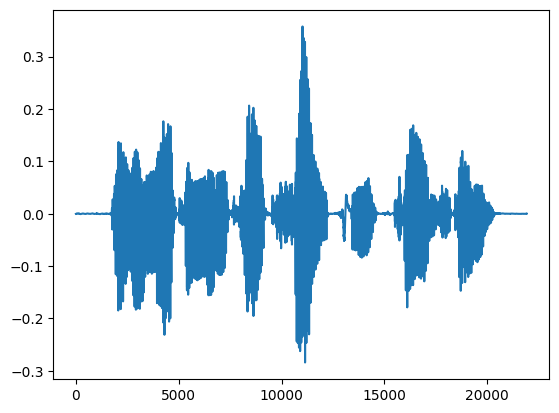

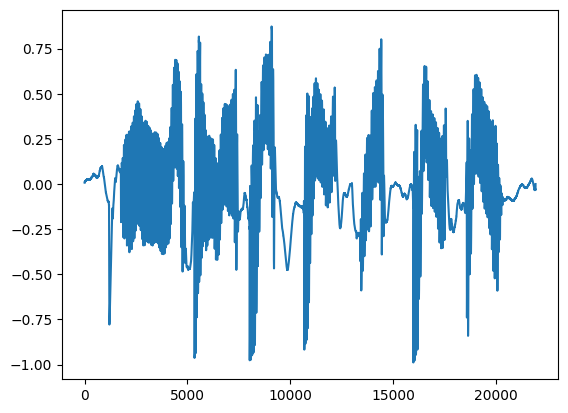

In [67]:
original=data[0]
egg=data[1]
plt.figure(0)
plt.plot(original)
plt.figure(1)
plt.plot(egg)

In [178]:
#Take 100 ms segmentation
frame=int(0.1*fs)
segOriginal=original[frame*4:frame*5]
segEgg=egg[frame*4:frame*5]

800
800


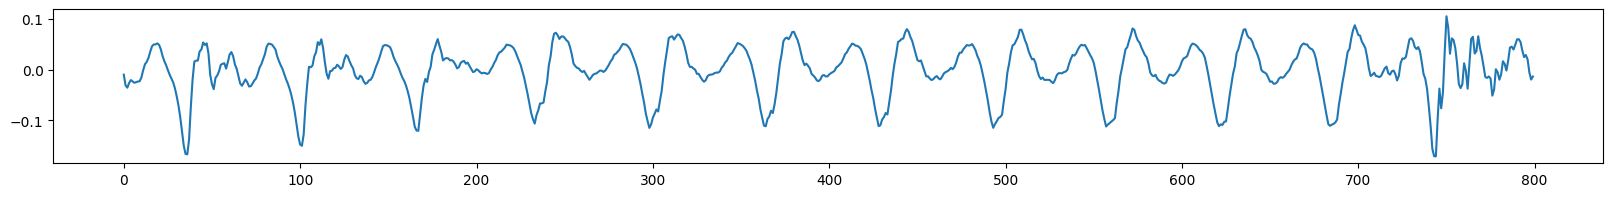

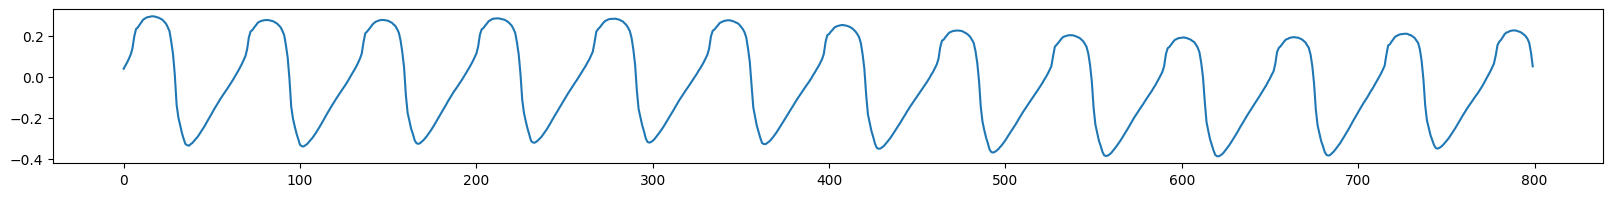

In [133]:
plt.figure(0, figsize=(20,2))
plt.plot(segOriginal)
plt.figure(1,figsize=(20,2))
plt.plot(segEgg)

In [120]:

# Difference the speech signal
x=np.zeros(len(segOriginal))
for i in range(len(segOriginal)):
       x[i]=segOriginal[i]-segOriginal[i-1]


In [86]:
#Ideal resonator at zero frequency
y1=np.zeros(len(x))
a1=-2
a2=1
for i in range(len(x)):
    y1[i]=-(((a1*y1[i-1])+x[i])+((a2*y1[i-2])+x[i]))

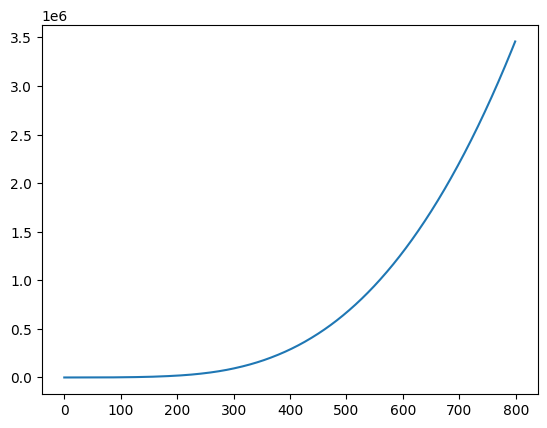

In [138]:
y2=np.zeros(len(x))

for i in range(len(x)):
    y2[i]=-(((a1*y2[i-1])+y1[i])+((a2*y2[i-2])+y1[i]))

plt.plot(y2)

In [231]:
#Calculating 2N+1 samples (10ms)
signal_length=len(y2)
window_size=int(0.01*fs) #no of samples in 10 ms (2N+1)
num_frames =round(signal_length/window_size)

N=round((window_size-1)/2)

y2cap=np.pad(y2,(N,N),mode='constant')


In [225]:
#Mean smoothing for 10 ms and subtracting from each sample
def mean_smoothing(input,win,N):
    y3=[]
    for i in range(N,len(input)-N):
        windowAvg=np.sum(input[(i-N):(i+N-1)]) / win
        y3.append(input[i]-windowAvg)
    return y3


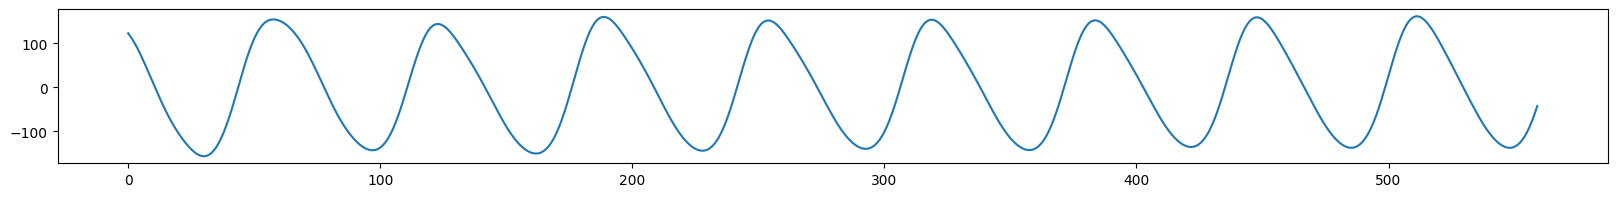

In [242]:
final=mean_smoothing(y2,window_size,N)
final1=mean_smoothing(final,window_size,N)
final2=mean_smoothing(final1,window_size,N)

plt.figure(0, figsize=(20,2))
plt.plot(final2)

In [238]:
def cal_epcoh(a):
    zero_crossings = np.where(np.diff(np.sign(a))>0)[0]
    return zero_crossings

In [239]:
epoch=cal_epcoh(final2)

In [263]:
diffEgg=np.diff(segEgg)

In [264]:
# plt.plot(final2)
# plt.plot(final2,markevery=epoch,ls="", marker="o", label="points")

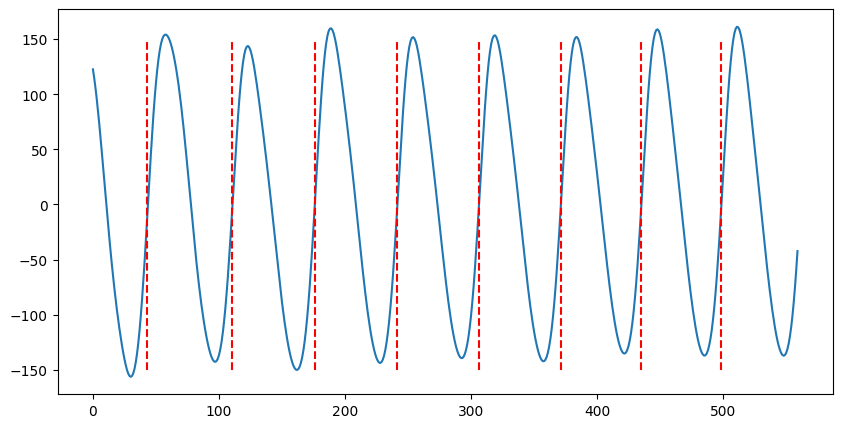

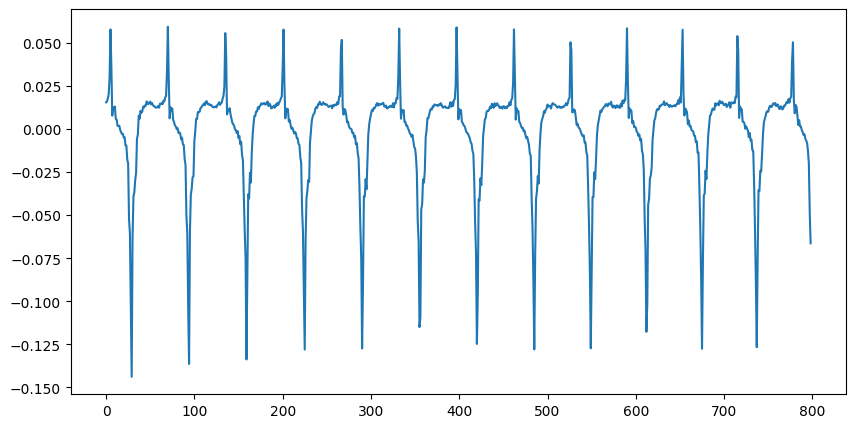

In [271]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(final2)
ax.vlines(epoch,-150,150,linestyles='dashed',color='red')
plt.figure(2,figsize=(10,5))
plt.plot(diffEgg)